<img src="td.jpg">

## Table of Contents
* [1. Problem Statement](#1.-Problem-Statement)  
* [2. Objective](#2.-Objective) 
* [3. Import all scientific and visualization packages](#3.-Import-all-scientific-and-visualization-packages)
* [4. Loading the datasets](#4.-Loading-the-datasets)
    * [4.1 Understand datatypes present in dataframe](#4.1-Understand-datatypes-present-in-dataframe)
* [5. Data Visualization](#5.-Data-Visualization)
* [6.Prepare the data set](#6.Prepare the data set)
    * [6.1 Handle imbalanced data using SMOTE](#6.1-Handle imbalanced data using SMOTE)
    * [6.2 Train a Random Forest model before and after scaling the data set](#6.2-Train-a-Random Forest-model before and after scaling the data set)

### 1. Problem Statement

 #### The dataset has the following attributes:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                    "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 Response Variable (desired target):__

17 - y - has the client subscribed to a __term deposit?__ (binary: "yes","no")

### 2. Objective

The Objective of this analysis is to Predict who will do a Term Deposit in the Financial Institution

### 3. Import all scientific and visualization packages

In [0]:
import pandas as pd                                                                                             # package to manipulate dataframe
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score       # Metrics to evaluate the model
import seaborn as sns                                                                                           # Visualization package
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier                                                             # Random Forest Classifier model
from sklearn.svm import SVC                                                                                     # Support Vector Classifier model
from sklearn.preprocessing import StandardScaler                                                                # For standardizing the dataset

### 4. Loading the dataset

In [0]:
!wget https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day3/Termdeposit.zip

In [0]:
!unzip Termdeposit.zip

In [0]:
df=pd.read_csv("Bank_Term_Deposit_Train.csv")                                     # Read the dataframe

In [0]:
pd.options.display.max_columns=None                                               # Allows us to view all the columns

In [0]:
# Checking the first 5 rows of the dataframe

df.head()

In [0]:
df.shape                                                                          # Checking the number of rows and columns

In [0]:
del df['Unnamed: 0']                                                            # Removing the first column
#df.drop('Unnamed: 0', axis = 1, inplace=True)

#### 4.1 Understand datatypes present in dataframe

In [0]:
df.info()                                                                          # Checking the info, missing values and data types

In [0]:
df.isnull().sum()                                                                    # Checking the missing values

In [0]:
df.y.value_counts()                                                                 # Find the total number of observations across all the classes given in Output var

In [0]:
df.describe()                                                                      # Checking the descriptive statistics

### 5. Data Visualization

In [0]:
plt.figure(figsize=[10,4])                                      # Setting the size of the figure
sns.barplot(y=df['balance'],x=df['y'],hue=df.education)         # Bar plot
plt.xlabel("FD:yes/no")                                         # Setting the label in x axis
plt.show()                                                      # Displaying the plot

People who have term deposit have more balance in bank.  <br> 
This is because term deposit is a good investment scheme with high rate of interest.  <br>
People who have term deposit are more educated.

In [0]:
plt.figure(figsize=[10,4])                                        # Setting the size of the figure
sns.barplot(y=df['age'],x=df['y'],hue=df.education)               # Bar plot
plt.xlabel("FD:yes/no")                                           # Setting the label in x axis
plt.show()                                          

People who have term deposit have more age.  <br>
It can be deduced that aged people create term deposit to save their retirement benefit.

In [0]:
plt.figure(figsize=[10,4])                                           # Setting the size of the figure
sns.barplot(y=df['y'],x=df['balance'],hue=df.loan)                   # Bar plot
plt.show()

Those who have annual balance is close to 1500 euro and don't have loan are not doing Term Deposit. We should inspect more which factors are prohibiting them from doing a Term Deposit

In [0]:
plt.figure(figsize=[10,5])                                           # Setting the size of the figure
sns.boxplot(x=df.y,y=df.balance,hue=df.loan)                         # Bar plot
plt.show()

We find some outliers in Annual balance in those who are not doing TD and having no loan

In [0]:
df[df.loan=='no'][df.y=='no'][df.balance>=1000][df.marital=='single'].shape[0]     # 293 people having no loan,single and annual
# greater than equal to 1000 are not doing Term Deposit.

In [0]:
# Distribution plot of Age

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['age'])
plt.show()

In [0]:
# Distribution plot of balance

from matplotlib import style
plt.figure(figsize=[10,5])
style.use('ggplot')
sns.distplot(df['balance'])
plt.show()

Balance variable is highly skewed to the right. Max number of people having low annual balance

###### Let's see how our Output variable looks like

In [0]:
df.y.value_counts()                                                                  # Checking the number of values for each class
#df['y'].value_counts()
#df.groupby(['job']).count() 

In [0]:
no=df['y']=='no'#.size()
no=no.sum()
yes=df['y']=='yes'
yes=yes.sum()

In [0]:
# Pie chart of both the classes

plt.figure(figsize=[4,4])
variables=['Yes','No']
values=[yes,no]
plt.pie(values,labels=variables,autopct='%1.1f%%', startangle=140)
plt.show()

In [0]:
# Creating the features and the labels

y=df['y']
X=df.drop(['y'],1)

In [0]:
x=X.copy()

In [0]:
df.shape                                         # Checking the number of rows and columns in the dataframe

In [0]:
# Getting the dummy values of job, marital, education, default, House, Loan, Contract, Month, poutcome

job_dummies=pd.get_dummies(X['job'],prefix='Job',drop_first=True)
marital_dummies=pd.get_dummies(X['marital'],prefix='Marital',drop_first=True)
edu_dummies=pd.get_dummies(X['education'],prefix='Edu',drop_first=True)
default_dummies=pd.get_dummies(X['default'],prefix='Default',drop_first=True)
housing_dummies=pd.get_dummies(X['housing'],prefix='House',drop_first=True)
loan_dummies=pd.get_dummies(X['loan'],prefix='Loan',drop_first=True)
contact_dummies=pd.get_dummies(X['contact'],prefix='Contact',drop_first=True)
month_dummies=pd.get_dummies(X['month'],prefix='Month',drop_first=True)
poutcome_dummies=pd.get_dummies(X['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
# Merge all the dummified categorical columns

X=pd.concat([X,job_dummies,marital_dummies,edu_dummies,default_dummies,housing_dummies,loan_dummies,contact_dummies,month_dummies,poutcome_dummies],1)

In [0]:
# Removing the non-dummified categorical columns

X=X.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)
X.shape

#### Checking the shape of input and output variables

In [0]:
y.shape

In [0]:
X.shape

### Convert response variable into numeric one

In [0]:
# Label Encoding the y variable

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
y=le.fit_transform(y)

In [0]:
pd.crosstab(y,'Count')                            # This shows that the dataset is imbalanced and we need to perform SMOTE

In [0]:
X.head()

#### 6.1 Handle imbalanced data using SMOTE

#### Please install imblearn to balance the imbalanced data set

In [0]:
#!pip install imblearn

#### SMOTE is done for imbalanced data set.
We'll do over-sampling thus we can increase the number of instances while balancing the dataset

In [0]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio='minority')
x_sm,y_sm=smote.fit_sample(X,y)

In [0]:
print(x_sm.shape)
print(y_sm.shape)

In [0]:
# Splitting the data into train and test set and checking their shape

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.20,random_state=12)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [0]:
pd.Series(y_sm).value_counts()                                                    # After SMOTE the classes are balanced

In [0]:
pd.Series(y_test).value_counts()

In [0]:
!pip install lightgbm                                                               # Installing LightGBM classifier

In [0]:
import lightgbm as lgb

In [0]:
train_data = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003                      # Learning rate 
params['boosting_type'] = 'gbdt'                     # Gradient Boosting Decision Tree
params['objective'] = 'binary'                       # Classify into binary classes
params['metric'] = 'binary_logloss'                  # metric is binary logloss
params['sub_feature'] = 0.5
params['num_leaves'] = 15                            # number of leaves in a full tree
params['min_data'] = 50                              # minimum number of data in the last leaf 
params['max_depth'] = 10                             # depth of tree
clf = lgb.train(params, train_data, 100)             # Train the model for 100 iteration

#### Prediction  train data

In [0]:
train_pred = clf.predict(x_train)

#### Prediction on test data

In [0]:
lightgbm_pred=clf.predict(x_test)

In [0]:

#convert into binary values
for i in range(0,6246):         # 6246 is the number of records
    if train_pred[i]>=.5:       # setting threshold to .5
       train_pred[i]=1
    else:  
       train_pred[i]=0

#### Train performance

In [0]:
print(accuracy_score(y_train, train_pred))            # Accuracy of the model

In [0]:
print(classification_report(y_train, train_pred))     

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3151
           1       0.91      0.90      0.91      3095

    accuracy                           0.91      6246
   macro avg       0.91      0.91      0.91      6246
weighted avg       0.91      0.91      0.91      6246



#### Validation performance

In [0]:
y_pred=clf.predict(x_test)
#convert into binary values
for i in range(0,1562):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [0]:
y_pred

In [0]:
# Checking all the metrics for the Test data

print(confusion_matrix(y_test, y_pred))                                # Print confusion matrix

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print('accuracy_score \n',accuracy_score(y_test,y_pred))

print('classification_report \n',classification_report(y_test,y_pred))

In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

### Prediction for upcoming four days

#### Day 1 prediction

#### Import Day 1 data

We have received Day1 data(Input)


Import day1_input

In [0]:
day1_input_df=pd.read_csv('Day1_input.xls')

In [0]:
day1_input_df.shape            # Rows and columns

(27, 16)

In [0]:
day1_input_df.tail()           # Check the last 5 rows

#### Feature Engineering the data from Day 1

In [0]:
new_input_features=x.append(day1_input_df)    # Add the last 5 days to train data

In [0]:
new_input_features.tail()                     # Check the last 5 rows

In [0]:
# Dummify categorical features 

job_dummies1=pd.get_dummies(new_input_features['job'],prefix='Job',drop_first=True)
marital_dummies1=pd.get_dummies(new_input_features['marital'],prefix='Marital',drop_first=True)
edu_dummies1=pd.get_dummies(new_input_features['education'],prefix='Edu',drop_first=True)
default_dummies1=pd.get_dummies(new_input_features['default'],prefix='Default',drop_first=True)
housing_dummies1=pd.get_dummies(new_input_features['housing'],prefix='House',drop_first=True)
loan_dummies1=pd.get_dummies(new_input_features['loan'],prefix='Loan',drop_first=True)
contact_dummies1=pd.get_dummies(new_input_features['contact'],prefix='Contact',drop_first=True)
month_dummies1=pd.get_dummies(new_input_features['month'],prefix='Month',drop_first=True)
poutcome_dummies1=pd.get_dummies(new_input_features['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features=pd.concat([new_input_features,job_dummies1,marital_dummies1,edu_dummies1,default_dummies1,housing_dummies1,loan_dummies1,contact_dummies1,month_dummies1,poutcome_dummies1],1)

In [0]:
new_input_features=new_input_features.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features.shape

In [0]:
# Removing the last 27 rows from the Day 1 data

onehot_encoded_new_input_features_day1=new_input_features.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day1.shape

(27, 42)

#### Predicting day1 data

In [0]:
day1_pred=clf.predict(onehot_encoded_new_input_features_day1)

In [0]:
for i in range(0,27):
    if day1_pred[i]>=.5:       # setting threshold to .5
       day1_pred[i]=1
    else:  
       day1_pred[i]=0

We have received actual what happend on day1(Actual day1_output)

In [0]:
day1_actual_output=pd.read_csv('Day1_Actual_output.xls')

In [0]:
day1_actual_output=le.fit_transform(day1_actual_output)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(classification_report(day1_actual_output,day1_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.38      1.00      0.55         3

    accuracy                           0.81        27
   macro avg       0.69      0.90      0.71        27
weighted avg       0.93      0.81      0.85        27



In [0]:
print(confusion_matrix(day1_actual_output,day1_pred))

[[19  5]
 [ 0  3]]


In [0]:
day1_recall=recall_score(day1_actual_output,day1_pred)
day1_recall

1.0

#### Data of Day 2 prediction

We have received Day2 data(Input)


Import day2_input

In [0]:
day2_input_df=pd.read_csv('Day2_input.xls')

In [0]:
day2_input_df.tail()

In [0]:
day2_input_df.shape

(27, 16)

#### Feature Engineering for Day 2

In [0]:
new_input_features1=x.append(day2_input_df)

In [0]:
new_input_features1.shape

(4440, 16)

In [0]:
job_dummies2=pd.get_dummies(new_input_features1['job'],prefix='Job',drop_first=True)
marital_dummies2=pd.get_dummies(new_input_features1['marital'],prefix='Marital',drop_first=True)
edu_dummies2=pd.get_dummies(new_input_features1['education'],prefix='Edu',drop_first=True)
default_dummies2=pd.get_dummies(new_input_features1['default'],prefix='Default',drop_first=True)
housing_dummies2=pd.get_dummies(new_input_features1['housing'],prefix='House',drop_first=True)
loan_dummies2=pd.get_dummies(new_input_features1['loan'],prefix='Loan',drop_first=True)
contact_dummies2=pd.get_dummies(new_input_features1['contact'],prefix='Contact',drop_first=True)
month_dummies2=pd.get_dummies(new_input_features1['month'],prefix='Month',drop_first=True)
poutcome_dummies2=pd.get_dummies(new_input_features1['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features1=pd.concat([new_input_features1,job_dummies2,marital_dummies2,edu_dummies2,default_dummies2,housing_dummies2,loan_dummies2,contact_dummies2,month_dummies2,poutcome_dummies2],1)

In [0]:
new_input_features1.shape

(4440, 51)

In [0]:
new_input_features1=new_input_features1.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features1.shape

(4440, 42)

In [0]:
new_input_features1.tail()

In [0]:
onehot_encoded_new_input_features_day2=new_input_features1.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day2.shape

(27, 42)

In [0]:
day2_pred=clf.predict(onehot_encoded_new_input_features_day2)

In [0]:
for i in range(0,27):
    if day2_pred[i]>=.5:       # setting threshold to .5
       day2_pred[i]=1
    else:  
       day2_pred[i]=0

We have received actual what happend on day2(Actual day2_output)

In [0]:
day2_Actual_output=pd.read_csv('Day2_Actual_output.xls')

In [0]:
day2_actual_output=le.fit_transform(day2_Actual_output)

In [0]:
print(classification_report(day2_actual_output,day2_pred))

In [0]:
print(confusion_matrix(day2_actual_output,day2_pred))

[[22  2]
 [ 2  1]]


In [0]:
day2_recall=recall_score(day2_actual_output,day2_pred)
day2_recall

0.3333333333333333

#### Prediction for Day 3

We have received Day3 data(Input)


Import day3_input

In [0]:
day3_input_df=pd.read_csv('Day3_input.xls')

In [0]:
day3_input_df.shape

(27, 16)

In [0]:
day3_input_df.tail()

#### Feature Engineering for Day 3

In [0]:
new_input_features2=x.append(day3_input_df)

In [0]:
new_input_features2.shape

(4440, 16)

In [0]:
job_dummies3=pd.get_dummies(new_input_features2['job'],prefix='Job',drop_first=True)
marital_dummies3=pd.get_dummies(new_input_features2['marital'],prefix='Marital',drop_first=True)
edu_dummies3=pd.get_dummies(new_input_features2['education'],prefix='Edu',drop_first=True)
default_dummies3=pd.get_dummies(new_input_features2['default'],prefix='Default',drop_first=True)
housing_dummies3=pd.get_dummies(new_input_features2['housing'],prefix='House',drop_first=True)
loan_dummies3=pd.get_dummies(new_input_features2['loan'],prefix='Loan',drop_first=True)
contact_dummies3=pd.get_dummies(new_input_features2['contact'],prefix='Contact',drop_first=True)
month_dummies3=pd.get_dummies(new_input_features2['month'],prefix='Month',drop_first=True)
poutcome_dummies3=pd.get_dummies(new_input_features2['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features2=pd.concat([new_input_features2,job_dummies3,marital_dummies3,edu_dummies3,default_dummies3,housing_dummies3,loan_dummies3,contact_dummies3,month_dummies3,poutcome_dummies3],1)

In [0]:
new_input_features2=new_input_features2.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features2.shape

(4440, 42)

In [0]:
onehot_encoded_new_input_features_day3=new_input_features2.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day3.tail()

In [0]:
onehot_encoded_new_input_features_day3.shape

#### Predicting day 3 data

We have received data of day 3(Input features) and we will predict the labels using clf model

In [0]:
day3_pred=clf.predict(onehot_encoded_new_input_features_day3)

In [0]:
for i in range(0,27):
    if day3_pred[i]>=.5:       # setting threshold to .5
       day3_pred[i]=1
    else:  
       day3_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [0]:
day3_Actual_output=pd.read_csv('Day3_Actual_output.xls')

In [0]:
day3_Actual_output=le.fit_transform(day3_Actual_output)
pd.crosstab(day3_Actual_output,'count')

In [0]:
print(classification_report(day3_Actual_output,day3_pred))

In [0]:
day3_recall=recall_score(day3_Actual_output,day3_pred)
day3_recall

In [0]:
print(confusion_matrix(day3_Actual_output,day3_pred))

#### Prediction for Day 4

Predicting day 4 data


We have received data of day 4(Input features) and we will predict the labels using clf model

In [0]:
day4_input_df=pd.read_csv('Day4_input.xls')

In [0]:
day4_input_df.tail()

In [0]:
day4_input_df.shape

(27, 16)

#### Feature Engineering for Day 4

In [0]:
new_input_features3=x.append(day4_input_df)

In [0]:
new_input_features3.shape

(4440, 16)

In [0]:
job_dummies4=pd.get_dummies(new_input_features3['job'],prefix='Job',drop_first=True)
marital_dummies4=pd.get_dummies(new_input_features3['marital'],prefix='Marital',drop_first=True)
edu_dummies4=pd.get_dummies(new_input_features3['education'],prefix='Edu',drop_first=True)
default_dummies4=pd.get_dummies(new_input_features3['default'],prefix='Default',drop_first=True)
housing_dummies4=pd.get_dummies(new_input_features3['housing'],prefix='House',drop_first=True)
loan_dummies4=pd.get_dummies(new_input_features3['loan'],prefix='Loan',drop_first=True)
contact_dummies4=pd.get_dummies(new_input_features3['contact'],prefix='Contact',drop_first=True)
month_dummies4=pd.get_dummies(new_input_features3['month'],prefix='Month',drop_first=True)
poutcome_dummies4=pd.get_dummies(new_input_features3['poutcome'],prefix='poutcome',drop_first=True)

In [0]:
new_input_features3=pd.concat([new_input_features3,job_dummies4,marital_dummies4,edu_dummies4,default_dummies4,housing_dummies4,loan_dummies4,contact_dummies4,month_dummies4,poutcome_dummies4],1)

In [0]:
new_input_features3=new_input_features3.drop(['job','marital','education','default','housing','loan','month','poutcome','contact'],axis=1)

In [0]:
new_input_features3.shape

(4440, 42)

In [0]:
onehot_encoded_new_input_features_day4=new_input_features3.iloc[-27:,:]

In [0]:
onehot_encoded_new_input_features_day4.tail()

Predicting day 4 data
We have received data of day 4(Input features) and we will predict the labels using clf model


In [0]:
day4_pred=clf.predict(onehot_encoded_new_input_features_day4)

In [0]:
for i in range(0,27):
    if day4_pred[i]>=.5:       # setting threshold to .5
       day4_pred[i]=1
    else:  
       day4_pred[i]=0

We have received actual what happend on day3(Actual day3_output)

In [0]:
day4_actual_output=pd.read_csv('Day4_Actual_output.xls')

In [0]:
day4_actual_output=le.fit_transform(day4_actual_output)
pd.crosstab(day4_actual_output,'count')

In [0]:
print(classification_report(day4_actual_output,day4_pred))

In [0]:
day4_recall=recall_score(day4_actual_output,day4_pred)
day4_recall

0.6666666666666666

In [0]:
print(confusion_matrix(day4_actual_output,day4_pred))

[[23  1]
 [ 1  2]]


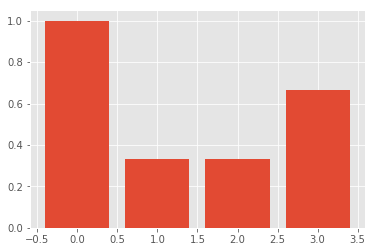

In [0]:
all_recall = [day1_recall, day2_recall, day3_recall, day4_recall]

a=range(0,4)
plt.bar(a,all_recall)
plt.show()

#### Retrain the model with day 1,2,3 and 4 data

In [0]:
import numpy as np

In [0]:
retrain_X=pd.concat([X,onehot_encoded_new_input_features_day1,onehot_encoded_new_input_features_day2,
                    onehot_encoded_new_input_features_day3,onehot_encoded_new_input_features_day4],axis=0)

In [0]:
Y=np.concatenate((y,day1_actual_output,day2_actual_output,day3_Actual_output,day4_actual_output),axis=0)

In [0]:
Y.shape

(4521,)

In [0]:
retrain_X.shape

(4521, 42)

In [0]:
smote=SMOTE(ratio='minority')
X_sm,Y_sm=smote.fit_sample(retrain_X,Y)

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.20,random_state=1234)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6400, 42)
(1600, 42)
(6400,)
(1600,)


In [0]:
d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 15
params['min_data'] = 50
params['max_depth'] = 10
clf1 = lgb.train(params, d_train, 100)

In [0]:
final_y_pred=clf1.predict(X_test)

In [0]:
for i in range(0,1600):
    if final_y_pred[i]>=0.5:
       final_y_pred[i]=1
    else:
       final_y_pred[i]=0

In [0]:
print('Accuracy\n',accuracy_score(Y_test,final_y_pred))

In [0]:
print('classification_report\n',classification_report(Y_test,final_y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       801
           1       0.89      0.90      0.90       799

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [0]:
print('confusion_matrix\n',confusion_matrix(Y_test,final_y_pred))

confusion_matrix
 [[713  88]
 [ 79 720]]


#### Compare Recall_score of final model with previous one

In [0]:
print(recall_score(y_test,y_pred))  # First model

0.8763906056860321


In [0]:
print(recall_score(Y_test,final_y_pred))  # Final model

ValueError: ignored

An improvement in recall score is obsevered in the final model built on the entire data
Thus we can retrain our existing model to find performance of the model on more data

#### Training a Random Forest Classifier on the entire data

In [0]:
rf=RandomForestClassifier() # Define the classifier

##### 6.2 Train a Random Forest model

In [0]:
rf_model=rf.fit(X_train,Y_train)
rf_train_pred=rf_model.predict(X_train)
print(accuracy_score(Y_train,rf_train_pred))

0.99640625


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Validate the model on validation data

In [0]:
rf_test_pred=rf_model.predict(X_test)
print(accuracy_score(rf_test_pred,Y_test))

0.92625


In [0]:
print(confusion_matrix(Y_test,rf_test_pred))
print('classification_report \n',classification_report(rf_test_pred,Y_test))

[[751  50]
 [ 68 731]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       819
           1       0.91      0.94      0.93       781

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



#### Recall score of RandomForest model

In [0]:
rf_recall=recall_score(rf_test_pred,Y_test)
rf_recall

0.9359795134443022

#### Recall Score of LightGBM model

In [0]:
lightGBM_recall=recall_score(Y_test,final_y_pred)
lightGBM_recall

ValueError: ignored

#### We can conclude that the performance of Random forest is better than LightGBM in terms of all the classification performance metrics

## Let's find ROC-AUC score and curve of Random forest model

In [0]:
predict_probabilities = rf_model.predict_proba(X_test)[:,1]

In [0]:
ROCAUC=roc_auc_score(Y_test,rf_test_pred)
ROCAUC

In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_probabilities)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Term Deposit data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

#### Scaling is required because attributes values given are in different scales
We have used Standard Scaler, It converts the entire data mean 0 and Standard Deviation 1 and you can scale the input data and train a model on your own